# 事前準備：共通コードの実行
* このノートブックに接続したら，まずは以下の2つの共通コード（コードAとコードB）を実行する
* これらの共通コードを実行しないと，それ以降のコードが実行できないので注意する
* また，コードAとコードBは，ノートブックに接続するたび毎回実行すること（ノートブックに接続中は，何度も実行する必要はない）
* 共通コードの詳細についての説明は割愛する（簡単な説明は第2回の「[サンプルノートブック02](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook02.ipynb)」を参照）

In [ ]:
# コードA：日本語化ライブラリ導入
! pip install japanize-matplotlib | tail -n 1

In [2]:
# コードB：共通事前処理

# B1:余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # matplotlib日本語化対応
import seaborn as sns

# B2:データフレーム表示用関数
from IPython.display import display

# B3:表示オプション調整
np.set_printoptions(suppress = True, precision = 3) #numpyの浮動小数点の表示精度
pd.options.display.float_format = '{:.3f}'.format #pandasでの浮動小数点の表示精度
pd.set_option('display.max_columns', None) #データフレームですべての列データを表示

# B4:グラフのデフォルトフォント指定
plt.rcParams['font.size'] = 14

# 乱数の種
random_seed = 1

# ボストン住宅データ
* 第6回「[サンプルノートブック06](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook06.ipynb)」で使用で使用した1970年代後半におけるボストンの住宅価格データ
* URL: https://bit.ly/4hwOUgx

|**列名**| **意味** |
|:--|:--|
|CRIME| その地域の犯罪発生率（high / low / very_low） |
|ZN| 25,000平方フィートを超える住居区画の占める割合（広い部屋の割合） |
|INDUS| 非小売業が占める面積の割合 |
|CHAS| チャールズ川の付近かどうかのダミー変数（1: 川周辺，0: それ以外） |
|NOX| 窒素酸化物の濃度 |
|RM| 1戸当たりの平均部屋数 |
|AGE| 1940年より前に建てられた物件の割合（築年数が35～40年ほどの割合） |
|DIS| ボストン市内の5つの雇用施設までの距離 |
|RAD| 主要高速道路へのアクセスしやすさの指標 |
|TAX| 10,000ドル当たりの固定資産税率 |
|PTRATIO| その地域の教員1人当たりの生徒数 |
|LSTAT| その地域の低所得者の割合 |
|PRICE| その地域の住宅平均価格（1,000ドル単位） |
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
*  3行目: `display`関数を使ってデータ（`df`の内容）を表示

In [37]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
display(df)

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,high,0.000,18.100,0,0.718,3.561,87.900,1.613,24.000,666,20.200,7.120,27.500
1,low,0.000,8.140,0,0.538,5.950,82.000,3.990,4.000,307,21.000,27.710,13.200
2,very_low,82.500,2.030,0,0.415,6.162,38.400,6.270,2.000,348,14.700,7.430,24.100
3,low,0.000,21.890,0,0.624,6.151,97.900,1.669,4.000,437,21.200,18.460,17.800
4,high,0.000,18.100,0,0.614,6.980,67.600,2.533,24.000,666,20.200,11.660,29.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,high,0.000,18.100,0,0.740,6.219,100.000,2.005,24.000,666,20.200,16.590,18.400
96,high,0.000,18.100,0,0.655,5.759,48.200,3.067,24.000,666,20.200,14.130,19.900
97,high,0.000,18.100,0,0.671,6.380,96.200,1.386,24.000,666,20.200,23.690,13.100
98,low,0.000,9.900,0,0.544,5.914,83.200,3.999,4.000,304,18.400,18.330,17.800


# 代表的な回帰モデル
* 線形回帰モデル
>* 最も基本的なモデルで説明変数と目的変数が線形関係にあると仮定
* 多項式回帰モデル
>* 線形回帰を拡張し，説明変数の高次の項を含めたモデル
>* 線形回帰モデルの説明変数を2乗，3乗，… した変数や説明変数同士の積などを説明変数に含んだモデルとなる
>* より複雑な非線形関係をモデル化できる
* リッジ回帰モデル／ラッソ回帰モデル
>* 線形回帰モデルと多項式回帰モデルは，回帰係数を求めるために最小化する損失関数を平均二乗誤差としている
>* これに対して，リッジ回帰モデルやラッソ回帰モデルは，平均二乗誤差にに正則化項（後述）を加えたものを損失関数としている
>* 過学習を起こしにくいモデルとなる
* エラスティックネット（Elastic Net）モデル
>* リッジ回帰とラッソ回帰の正則化項を組み合わせたモデル
* 回帰木モデル
>* 分類木の概念を回帰に応用したモデル
>* 説明変数と目的変数の間の非線形関係もモデル化できる
>* そのため，複雑なデータ構造に対応する柔軟性を持つ
>* データのスケールの影響が少ないため，データの標準化を必要としない
>* 変数間の複雑な関係を木構造で可視化できるため，人間が理解しやすい形でモデルを示すことができる
* ランダムフォレスト回帰モデル
>* 複数の回帰木を組み合わせたモデル
>* 各回帰木の予測を平均化することで，モデルの精度を向上させる

# データの前処理

## 前処理の概要
* まずは，多項式回帰モデルを考える
* このモデルに合わせて以下の前処理を順に行う
>* 学習に利用しないCRIM列を削除する（欠損値への対処を単純化するためでもある）
>* 欠損値を算術平均に置き換える
>* 外れ値を選択・削除する
>* 目的変数と説明変数に分割
>* 訓練データ（70％）とテストデータ（30%）に分割
>* データの標準化
* 本来は「訓練データ＆検証データ」と「テストデータ」に分割し，モデルをチューニングする作業も行うが，ここではチューニング作業を省略する

## 列の削除／欠損値の対処／外れ値の削除
* `drop`メソッドを用いて，CRIME列をDataFrameから削除 ⇒ `df.drop(['CRIM'], axis = 1)`
>* `axis = 1`で行データを削除
* 欠損値を算術平均に置き換える ⇒ `df.fillna(df.mean())`
>* `mean`メソッドで求めた算術平均を引数として，`fillna`メソッドを呼び出す
* `drop`メソッドで外れ値を削除 ⇒ `df.drop([76], axis = 0)`
>* 第6回講義「線形回帰モデルの学習(2)」と同様に，インデックス76のデータを外れ値として削除する
>* `axis = 0`で行データを削除
  
**［以下のコードの処理内容］**
* 1～2行目: ファイルをDataFrameとして読み込み，変数`df`に代入
* 3行目: `drop`メソッドで，`df`からCRIME列を削除し，その結果を`df`に代入
* 4行目: `fillna`メソッドと`mean`メソッドを使って，`df`の欠損値を算術平均で穴埋めし，その結果を`df`に代入
* 5行目: `drop`メソッドで，`df`から外れ値（インデックス76に対応する行データ）を削除し，その結果を`df`に代入
* 6行目: `isnull`メソッドと`sum`メソッドを組み合わせて，各列の欠損値の数を計算して，`display`関数で表示する

In [38]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
df = df.drop([76], axis = 0)
display(pd.DataFrame(df.isnull().sum(), columns = ['欠損値の数']))

,欠損値の数
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0
PTRATIO,0


## 目的変数と説明変数に分割
* `PRICE`を目的変数とする
* 説明変数として，`RM`, `LSTAT`, `PTRATIO`を選択する
* さらに，説明変数として選択した `RM`, `LSTAT`, `PTRATIO` から決まる以下の量を説明変数に加える
>* `RM^2`: `RM`の2乗
>* `LSTAT^2`：, `LSTAT`の2乗
>* `PTRATIO^2`： `PTRATIO`の2乗
>* `RM LSTAT`： `RM`と`LSTAT`の積
>* `RM PTRATIO`： `RM`と`PTRATIO`の積
>* `LSTAT PTRATIO`： `LSTAT`と`PTRATIO`の積
* `RM LSTAT`, `RM PTRATIO`, `LSTAT PTRATIO` を交互作用項と呼ぶ
* また，このモデルを次数が2（2次）の多項式回帰モデルと呼ぶ
* 任意の次数の多項式回帰モデルの説明変数は，`sklearn`（scikit-learn）の`preprocessing`モジュールにおける，`PolynomialFeatures`クラスを利用することで簡単に作成できる
  
**［`PolynomialFeatures`クラスによる説明変数の作成手順］**
* まず，多項式モデルの説明変数を生成するためのオブジェクトを`PolynomialFeatures`クラスから生成し，変数に代入する
* 書式: `変数 = PolynomialFeatures(degree = 次数, include_bias = False)`  
>* `include_bias`: 定数項を含む（`True`），含まない（`False`）を指定
>* `include_bias = True`にすると，すべての値が1の列（定数項）を作成する
>* `include_bias = False`は，この列を作成しないということになるが，モデルの学習において定数項を0にするという意味ではないことに注意する
* 生成したオブジェクトの`fit_transform`メソッドに説明変数データを渡して呼び出す
* 書式: `変数.fit_transform(元の説明変数データ)`
>* 引数で指定した説明変数データに対して，次数に応じた説明変数データが生成される
>* 戻り値のクラス（データ型）は ndarray
  
**［以下のコードの処理内容］**
* 1～2行目: ファイルをDataFrameとして読み込み，変数`df`に代入
* 3～5行目: 列の削除，欠損値の対処，外れ値の削除
* 6行目: 説明変数の列名を要素とするリスト`['RM', 'PTRATIO', 'LSTAT']`を変数`x_cols`に代入
* 7行目: 目的変数の列名（リスト）`['PRICE']`を変数`t_col`に代入
* 8行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 9行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 10行目: `preprocessing`モジュールの`PolynomialFeatures`クラスの読み込み
* 11行目: `PolynomialFeatures`クラスのオブジェクトを生成し，変数`pf`に代入
>* `degree = 2`で，2次の多項式回帰モデルを指定
>* `include_bias = False`で，定数項の列を作成しない
* 12行目: `fit_transform`メソッドで，2次の多項式回帰モデルの説明変数データを生成し，変数`x`に代入
>* 引数は3つの説明変数 `RM`, `PTRATIO`, `LSTAT` のデータ `x`
>* このデータをもとに2次の多項式回帰モデルの説明変数データ（2次の項） `RM^2`, `LSTAT^2`, `PTRATIO^2`, `RM LSTAT`, `RM PTRATIO`, `LSTAT PTRATIO`を生成
* 13行目: `DataFrame`関数で，`x`をDataFrameに変換し，その結果を変数`x`に代入
>* `pf.get_feature_names_out()`で，2次の多項式回帰モデルの説明変数名を取り出し，DataFrameの列名（`columns`）として設定
* 14行目: `display`関数で，`x`の内容を表示

In [39]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
df = df.drop([76], axis = 0)
x_cols = ['RM', 'PTRATIO', 'LSTAT']
t_col = ['PRICE']
x = df[x_cols]
t = df[t_col]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2, include_bias = False)
x = pf.fit_transform(x)
x = pd.DataFrame(x, columns = pf.get_feature_names_out())
display(x)

,RM,PTRATIO,LSTAT,RM^2,RM PTRATIO,RM LSTAT,PTRATIO^2,PTRATIO LSTAT,LSTAT^2
0,3.561,20.200,7.120,12.681,71.932,25.354,408.040,143.824,50.694
1,5.950,21.000,27.710,35.403,124.950,164.875,441.000,581.910,767.844
2,6.162,14.700,7.430,37.970,90.581,45.784,216.090,109.221,55.205
3,6.151,21.200,18.460,37.835,130.401,113.547,449.440,391.352,340.772
4,6.980,20.200,11.660,48.720,140.996,81.387,408.040,235.532,135.956
...,...,...,...,...,...,...,...,...,...
94,6.219,20.200,16.590,38.676,125.624,103.173,408.040,335.118,275.228
95,5.759,20.200,14.130,33.166,116.332,81.375,408.040,285.426,199.657
96,6.380,20.200,23.690,40.704,128.876,151.142,408.040,478.538,561.216
97,5.914,18.400,18.330,34.975,108.818,108.404,338.560,337.272,335.989


## 訓練データとテストデータに分割／データの標準化
* 説明変数と目的変数に分割できたので，次に，訓練データとテストデータに分割し，データの標準化を行う
* 分割と標準化の処理は第6回「[サンプルノートブック06](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook06.ipynb)」のコードと同様
  
**［以下のコードの処理内容］**
* 1～2行目: ファイルをDataFrameとして読み込み，変数`df`に代入
* 3～5行目: 列の削除，欠損値の対処，外れ値の削除
* 6～13行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 14行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 15行目: 説明変数と目的変数を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 16行目: `preprocessing`モジュールの`StandardScaler`クラスの読み込み
* 17行目: `StandardScaler`クラスのオブジェクトを生成し，変数`sc_x`に代入
* 18行目: `sc_x`に対し，`fit`メソッドを適用する（引数は`x_train`）
* 19行目: `sc_x`に対する`transform`メソッドで`x_train`を標準化し，その結果を変数`x_train_s`に代入
* 20行目: `DataFrame`関数で，`x_train_s`をDataFrameに変換し，その結果を変数`x_train_s`に代入
* 21行目: `sc_x`に対する`transform`メソッドで`x_test`を標準化し，その結果を変数`x_test_s`に代入
* 22行目: `DataFrame`関数で，`x_test_s`をDataFrameに変換し，その結果を変数`x_test_s`に代入
* 23行目: `StandardScaler`クラスのオブジェクトを生成し，変数`sc_t`に代入
* 24行目: `sc_t`に対し，`fit`メソッドを適用する（引数は`t_train`）
* 25行目: `sc_t`に対する`transform`メソッドで`t_train`を標準化し，その結果を変数`t_train_s`に代入
* 26行目: `DataFrame`関数で，`t_train_s`をDataFrameに変換し，その結果を変数`t_train_s`に代入
* 27行目: `sc_t`に対する`transform`メソッドで`t_test`を標準化し，その結果を変数`t_test_s`に代入
* 28行目: `DataFrame`関数で，`t_test_s`をDataFrameに変換し，その結果を変数`t_test_s`に代入
* 29～36行目: `x_train_s`, `x_test_s`, `t_train_s`, `t_test_s`の内容をそれぞれ表示

In [40]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
df = df.drop([76], axis = 0)
x_cols = ['RM', 'PTRATIO', 'LSTAT']
t_col = ['PRICE']
x = df[x_cols]
t = df[t_col]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2, include_bias = False)
x = pf.fit_transform(x)
x = pd.DataFrame(x, columns = pf.get_feature_names_out())
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_s = sc_x.transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns = x_train.columns)
x_test_s = sc_x.transform(x_test)
x_test_s = pd.DataFrame(x_test_s, columns = x_test.columns)
sc_t = StandardScaler()
sc_t.fit(t_train)
t_train_s = sc_t.transform(t_train)
t_train_s = pd.DataFrame(t_train_s, columns = t_train.columns)
t_test_s = sc_t.transform(t_test)
t_test_s = pd.DataFrame(t_test_s, columns = t_test.columns)
print('================ x_train_s ================')
display(x_train_s)
print('================ t_train_s ================')
display(pd.DataFrame(t_train_s))
print('================ x_test_s ================')
display(x_test_s)
print('================ t_test_s ================')
display(pd.DataFrame(t_test_s))

================ x_train_s ================


,RM,PTRATIO,LSTAT,RM^2,RM PTRATIO,RM LSTAT,PTRATIO^2,PTRATIO LSTAT,LSTAT^2
0,-0.503,1.182,0.641,-0.523,0.566,0.613,1.248,0.861,0.388
1,0.306,-0.999,-0.497,0.245,-0.601,-0.437,-1.036,-0.628,-0.559
2,-0.461,-1.963,-0.039,-0.485,-2.084,-0.089,-1.878,-0.422,-0.244
3,-1.131,0.015,2.644,-1.071,-1.032,2.353,-0.039,2.436,3.398
4,-0.859,-0.340,0.599,-0.839,-1.061,0.459,-0.401,0.445,0.344
...,...,...,...,...,...,...,...,...,...
64,0.187,-0.847,-0.758,0.127,-0.562,-0.753,-0.894,-0.827,-0.699
65,-0.426,0.827,-0.128,-0.453,0.344,-0.174,0.840,-0.005,-0.313
66,-0.118,1.233,-0.491,-0.166,1.026,-0.504,1.307,-0.316,-0.556
67,-0.277,-1.709,0.151,-0.315,-1.722,0.158,-1.667,-0.232,-0.088


================ t_train_s ================


,PRICE
0,-0.346
1,0.146
2,-0.394
3,0.157
4,-0.358
...,...
64,0.026
65,-0.214
66,-0.214
67,-0.418


================ x_test_s ================


,RM,PTRATIO,LSTAT,RM^2,RM PTRATIO,RM LSTAT,PTRATIO^2,PTRATIO LSTAT,LSTAT^2
0,-1.455,-1.963,2.455,-1.336,-2.838,1.996,-1.878,1.413,3.043
1,0.057,0.827,-0.237,0.001,0.847,-0.190,0.840,-0.115,-0.391
2,0.492,-0.999,-1.065,0.431,-0.441,-1.070,-1.036,-1.100,-0.826
3,0.010,0.827,0.143,-0.045,0.797,0.222,0.840,0.269,-0.094
4,-1.286,0.827,2.198,-1.199,-0.554,1.843,0.840,2.347,2.581
5,1.375,-0.593,-0.908,1.368,0.739,-0.778,-0.651,-0.930,-0.766
6,2.237,-0.390,-0.724,2.363,1.743,-0.418,-0.451,-0.746,-0.682
7,0.143,0.218,-0.853,0.084,0.377,-0.866,0.174,-0.799,-0.742
8,2.331,-0.390,-1.200,2.477,1.830,-1.071,-0.451,-1.171,-0.869
9,2.927,-0.593,-1.277,3.218,2.133,-1.133,-0.651,-1.251,-0.890


================ t_test_s ================


,PRICE
0,-0.550
1,0.074
2,0.841
3,-0.118
4,-1.438
5,1.105
6,2.089
7,0.289
8,3.312
9,3.108


# 多項式回帰モデルの学習と評価
* 以下のコードで，前処理したボストン住宅データで多項式回帰モデルの学習と評価
* 学習と評価（一連の分析）の処理は第6回「[サンプルノートブック06](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook06.ipynb)」のコードと同様
* ただし，予測の処理は除く
* 実行結果の決定係数をみると，テストデータに対する決定係数は，訓練データに対する決定係数よりも小さくなっており，過学習が発生している
>* これを過学習と判断するかは分析者次第のところもある
  
**［以下のコードの処理内容］**
* 1～2行目: ファイルをDataFrameとして読み込み，変数`df`に代入
* 3～5行目: 列の削除，欠損値の対処，外れ値の削除
* 6～13行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 14～15行目:  説明変数と目的変数を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 16～28行目: データの標準化を行い，その結果を`x_train_s`, `x_test_s`, `t_train_s`, `t_test_s`にそれぞれ代入
* 29行目:  `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 30行目: `LinearRegression()`で，モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 31行目: 標準化した訓練データ（`x_train_s`と`t_train_s`）を用いて，`fit`メソッドでモデルの学習を実行
* 32行目: `linear_regression_model.score(X = x_train_s, y = t_train_s)`で，標準化した訓練データに対する決定係数を計算して変数`score_train`に代入
* 33行目: `linear_regression_model.score(X = x_test_s, y = t_test_s)`で，標準化したテストデータに対する決定係数を計算して変数`score_test`に代入
* 34行目: `print`関数とf-stringを使って，訓練データに対する決定係数（`score_train`）とテストデータに対する決定係数（`score_test`）を小数点以下3桁まで表示
* 35行目: `linear_regression_model`オブジェクトの`coef_`属性から回帰係数（定数項以外）を取り出し，変数`a`に代入
* 36行目: `linear_regression_model`オブジェクトの`intercept_`属性から定数項を取り出し，変数`b`に代入
* 37行目: `print`関数とf-stringを使って，回帰係数`a`を表示
* 38行目: `print`関数とf-stringを使って，定数項`b`を表示（標準化しているので 0 になる）

In [68]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
df = df.drop([76], axis = 0)
x_cols = ['RM', 'PTRATIO', 'LSTAT']
t_col = ['PRICE']
x = df[x_cols]
t = df[t_col]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2, include_bias = False)
x = pf.fit_transform(x)
x = pd.DataFrame(x, columns = pf.get_feature_names_out())
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_s = sc_x.transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns = x_train.columns)
x_test_s = sc_x.transform(x_test)
x_test_s = pd.DataFrame(x_test_s, columns = x_test.columns)
sc_t = StandardScaler()
sc_t.fit(t_train)
t_train_s = sc_t.transform(t_train)
t_train_s = pd.DataFrame(t_train_s, columns = t_train.columns)
t_test_s = sc_t.transform(t_test)
t_test_s = pd.DataFrame(t_test_s, columns = t_test.columns)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train_s, y = t_train_s)
score_train = linear_regression_model.score(X = x_train_s, y = t_train_s)
score_test = linear_regression_model.score(X = x_test_s, y = t_test_s)
print(f'訓練データの決定係数={score_train:.3f} / テストデータの決定係数={score_test:.3f}')
a = linear_regression_model.coef_
b = linear_regression_model.intercept_
print(f'回帰係数（定数項以外）: {a}')
print(f'定数項: {b}')

訓練データの決定係数=0.852 / テストデータの決定係数=0.727
回帰係数（定数項以外）: [[-1.08   2.033  1.784  2.269 -0.434 -2.455 -1.831  0.516  0.008]]
定数項: [0.]


# リッジ回帰モデルの学習と評価
* 多項式回帰モデルの学習を行った結果，過学習が起きていることが確認できた
* この問題を改善するためにモデルを変更する
* ここでは，リッジ回帰モデルで学習を試みる

## モデルの学習と評価
* ここでは，正則化パラメータを5としたときの，リッジ回帰モデルの学習を行う
* リッジ回帰モデルの学習は，`sklearn`（scikit-learn）の`linear_model`モジュールにおける`Ridge`クラスを使う
* `Ridge`クラスは，線形回帰モデルの学習を行うときに用いるクラス（`LinearRegression`クラス）とは異なるクラス
* リッジ回帰モデルの学習の流れ:
>* `Ridge`クラスを読み込む（インポートする）
>* インポートの書式: `from sklearn.linear_model import Ridge`
>* `Ridge`クラスのオブジェクトを生成し，変数に代入する
>* オブジェクト生成の書式: `変数 = Ridge(alpha = 正則化パラメータ)`
>* モデルを学習する
>* モデルの学習の書式（これまでのモデルと同様）: `変数.fit(説明変数データ, 目的変数データ)`
* 以下のコードで，モデルの学習と評価（訓練データとテストデータに対する決定係数をそれぞれ計算）を行う
* 決定係数の計算は，これまでのモデルと同様に`score`メソッドを用いる
* 実行結果の決定係数から，過学習の問題が改善されていることがわかる
* ただし，正則化パラメータの値やデータによってモデルの性能（決定係数）が変わってくることに注意する
  
**［以下のコードの処理内容］**
* 1～2行目: ファイルをDataFrameとして読み込み，変数`df`に代入
* 3～5行目: 列の削除，欠損値の対処，外れ値の削除
* 6～13行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 14～15行目:  説明変数と目的変数を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 16～28行目: データの標準化を行い，その結果を`x_train_s`, `x_test_s`, `t_train_s`, `t_test_s`にそれぞれ代入
* 29行目:  `sklearn` (scikit-learn) の`linear_model`モジュール内にある`Ridge`クラスを読み込む 
* 30行目: `Ridge(alpha = 5)`で，モデルの学習を行うためのオブジェクトを`Ridge`クラスから生成し，変数`ridge_regression_model`に代入
>* `alpha = 5`で，正則化パラメータを 5と設定
* 31行目: 標準化した訓練データ（`x_train_s`と`t_train_s`）を用いて，`fit`メソッドでモデルの学習を実行
* 32行目: `ridge_regression_model.score(X = x_train_s, y = t_train_s)`で，標準化した訓練データに対する決定係数を計算して変数`score_train`に代入
* 33行目: `ridge_regression_model.score(X = x_test_s, y = t_test_s)`で，標準化したテストデータに対する決定係数を計算して変数`score_test`に代入
* 34行目: `print`関数とf-stringを使って，訓練データに対する決定係数（`score_train`）とテストデータに対する決定係数（`score_test`）を小数点以下3桁まで表示
* 35行目: `ridge_regression_model`オブジェクトの`coef_`属性から回帰係数（定数項以外）を取り出し，変数`a`に代入
* 36行目: `ridge_regression_model`オブジェクトの`intercept_`属性から定数項を取り出し，変数`b`に代入
* 37行目: `print`関数とf-stringを使って，回帰係数`a`を表示
* 38行目: `print`関数とf-stringを使って，定数項`b`を表示（標準化しているので 0 になる）

In [69]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
df = df.drop([76], axis = 0)
x_cols = ['RM', 'PTRATIO', 'LSTAT']
t_col = ['PRICE']
x = df[x_cols]
t = df[t_col]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2, include_bias = False)
x = pf.fit_transform(x)
x = pd.DataFrame(x, columns = pf.get_feature_names_out())
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_s = sc_x.transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns = x_train.columns)
x_test_s = sc_x.transform(x_test)
x_test_s = pd.DataFrame(x_test_s, columns = x_test.columns)
sc_t = StandardScaler()
sc_t.fit(t_train)
t_train_s = sc_t.transform(t_train)
t_train_s = pd.DataFrame(t_train_s, columns = t_train.columns)
t_test_s = sc_t.transform(t_test)
t_test_s = pd.DataFrame(t_test_s, columns = t_test.columns)
from sklearn.linear_model import Ridge
ridge_regression_model = Ridge(alpha = 5)
ridge_regression_model.fit(X = x_train_s, y = t_train_s)
score_train = ridge_regression_model.score(X = x_train_s, y = t_train_s)
score_test = ridge_regression_model.score(X = x_test_s, y = t_test_s)
print(f'訓練データの決定係数={score_train:.3f} / テストデータの決定係数={score_test:.3f}')
a = ridge_regression_model.coef_
b = ridge_regression_model.intercept_
print(f'回帰係数（定数項以外）: {a}')
print(f'定数項: {b}')

訓練データの決定係数=0.756 / テストデータの決定係数=0.835
回帰係数（定数項以外）: [ 0.123  0.016 -0.16   0.57  -0.275 -0.418  0.013 -0.023  0.278]
定数項: [0.]


### 参考コード（理解する必要はない）
* 以下のコードは，正則化パラメータを0.1から20.0まで0.1刻みで変化させたときの決定係数を求め，決定係数の最大値とそのときの正則化パラメータの値を出力する
* また，データを分割する際に使用する乱数の種を変数`seed`で指定している（1行目）

In [85]:
seed = 1 # 乱数の種
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
df = df.drop([76], axis = 0)
x_cols = ['RM', 'PTRATIO', 'LSTAT']
t_col = ['PRICE']
x = df[x_cols]
t = df[t_col]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2, include_bias = False)
x = pf.fit_transform(x)
x = pd.DataFrame(x, columns = pf.get_feature_names_out())
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = seed)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_s = sc_x.transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns = x_train.columns)
x_test_s = sc_x.transform(x_test)
x_test_s = pd.DataFrame(x_test_s, columns = x_test.columns)
sc_t = StandardScaler()
sc_t.fit(t_train)
t_train_s = sc_t.transform(t_train)
t_train_s = pd.DataFrame(t_train_s, columns = t_train.columns)
t_test_s = sc_t.transform(t_test)
t_test_s = pd.DataFrame(t_test_s, columns = t_test.columns)
from sklearn.linear_model import Ridge
max_score = 0 # 最大の決定係数を格納する変数
max_param = 0 # そのときの正則化パラメータを格納する変数
for i in range(1, 201):
    param = i/10
    ridge_regression_model = Ridge(alpha = param)
    ridge_regression_model.fit(X = x_train_s, y = t_train_s)
    score = ridge_regression_model.score(X = x_test_s, y = t_test_s)
    if score > max_score:
        max_score = score
        max_param = param
print(f'最大の決定係数: {max_score:.3f}')
print(f'そのときの正則化パラメータ: {max_param}')

最大の決定係数: 0.836
そのときの正則化パラメータ: 3.7


## 回帰係数の大きさの比較
* 次に，多項式回帰モデルとリッジ回帰モデルの大きさを比較する
* 回帰係数（切片以外）は`coef_`プロパティ，切片は`intercept_`プロパティで確認できる
* 以下のコードでは，多項式回帰モデルとリッジ回帰モデル（正則化パラメータは5）の学習をそれぞれ行い，回帰係数の絶対値の合計をそれぞれ計算している
* なお，データの標準化により，定数項は 0 となるので，合計の計算には定数項を入れていない
  
**［以下のコードの処理内容］**
* 1～2行目: ファイルをDataFrameとして読み込み，変数`df`に代入
* 3～5行目: 列の削除，欠損値の対処，外れ値の削除
* 6～13行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 14～15行目:  説明変数と目的変数を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 16～28行目: データの標準化を行い，その結果を`x_train_s`, `x_test_s`, `t_train_s`, `t_test_s`にそれぞれ代入
* 29～33行目: 多項式回帰モデルの学習を行い，回帰係数を表示
* 34～38行目: リッジ回帰モデルの学習を行い，回帰係数を表示
* 39行目: `sum`関数と`abs`関数を使って，多項式回帰モデルの回帰係数の絶対値の合計を計算し，変数`sum_coef_linear`に代入
>*  `abs`関数は引数でしていした数値の絶対値を返す
>*  `coef_[0]`で，回帰係数のリストを取り出している
>*  `sum`関数は引数で指定した複数の数値の合計を返す
* 40行目: 同様に `sum`関数と`abs`関数を使って，リッジ回帰モデルの回帰係数の絶対値の合計を計算し，変数`sum_coef_ridge`に代入
>*  `coef_`のデータ構造が，`linear_regression_model`と異なるので，回帰係数の指定が`coef_[0]`ではなく，`coef_`となっている
* 41行目: `print`関数とf-stringを使って，多項式回帰モデルの回帰係数の絶対値の合計 `sum_coef_linear`を表示
* 42行目: `print`関数とf-stringを使って，リッジ回帰モデルの回帰係数の絶対値の合計 `sum_coef_ridge`を表示

In [ ]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
df = df.drop([76], axis = 0)
x_cols = ['RM', 'PTRATIO', 'LSTAT']
t_col = ['PRICE']
x = df[x_cols]
t = df[t_col]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2, include_bias = False)
x = pf.fit_transform(x)
x = pd.DataFrame(x, columns = pf.get_feature_names_out())
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_s = sc_x.transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns = x_train.columns)
x_test_s = sc_x.transform(x_test)
x_test_s = pd.DataFrame(x_test_s, columns = x_test.columns)
sc_t = StandardScaler()
sc_t.fit(t_train)
t_train_s = sc_t.transform(t_train)
t_train_s = pd.DataFrame(t_train_s, columns = t_train.columns)
t_test_s = sc_t.transform(t_test)
t_test_s = pd.DataFrame(t_test_s, columns = t_test.columns)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train_s, y = t_train_s)
a = linear_regression_model.coef_
print(f'多項式回帰モデルの回帰係数（定数項以外）: {a}')
from sklearn.linear_model import Ridge
ridge_regression_model = Ridge(alpha = 5)
ridge_regression_model.fit(X = x_train_s, y = t_train_s)
a = ridge_regression_model.coef_
print(f'リッジ回帰モデルの回帰係数（定数項以外）: {a}')
sum_coef_linear = sum(abs(linear_regression_model.coef_[0]))
sum_coef_ridge = sum(abs(ridge_regression_model.coef_))
print(f'多項式回帰モデルの回帰係数の合計: {sum_coef_linear:.3f}')
print(f'リッジ回帰モデルの回帰係数の合計: {sum_coef_ridge:.3f}')

多項式回帰モデルの回帰係数（定数項以外）: [[-1.08   2.033  1.784  2.269 -0.434 -2.455 -1.831  0.516  0.008]]
リッジ回帰モデルの回帰係数（定数項以外）: [ 0.123  0.016 -0.16   0.57  -0.275 -0.418  0.013 -0.023  0.278]
多項式回帰モデルの回帰係数の合計: 12.411
リッジ回帰モデルの回帰係数の合計: 1.876


# ラッソ回帰モデルの学習

## モデルの学習と評価
* ここでは，正則化パラメータを0.05としたときの，ラッソ回帰モデルの学習を行う
* ラッソ回帰モデルの学習は，`sklearn`（scikit-learn）の`linear_model`モジュールにおける`Lasso`クラスを使う
* 学習の流れは，リッジ回帰モデルと同様
* ラッソ回帰モデルの学習の流れ:
>* `Lasso`クラスを読み込む（インポートする）
>* インポートの書式: `from sklearn.linear_model import Lasso`
>* `Lasso`クラスのオブジェクトを生成し，変数に代入する
>* オブジェクト生成の書式: `変数 = Lasso(alpha = 正則化パラメータ)`
>* モデルを学習する
>* モデルの学習の書式（これまでのモデルと同様）: `変数.fit(説明変数データ, 目的変数データ)`
* 以下のコードで，モデルの学習と評価（訓練データとテストデータに対する決定係数をそれぞれ計算）を行う
* 決定係数の計算は，これまでのモデルと同様に`score`メソッドを用いる
* リッジ回帰モデルの学習と同様，正則化パラメータの値やデータによってモデルの性能（決定係数）が変わってくることに注意する
* ラッソ回帰モデルの学習では，目的変数に影響を与えない説明変数の係数を0にするという特徴があるが，実行結果から．それが確認できる
  
**［以下のコードの処理内容］**
* 1～2行目: ファイルをDataFrameとして読み込み，変数`df`に代入
* 3～5行目: 列の削除，欠損値の対処，外れ値の削除
* 6～13行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 14～15行目:  説明変数と目的変数を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 16～28行目: データの標準化を行い，その結果を`x_train_s`, `x_test_s`, `t_train_s`, `t_test_s`にそれぞれ代入
* 29行目:  `sklearn` (scikit-learn) の`linear_model`モジュール内にある`Lasso`クラスを読み込む 
* 30行目: `Lasso(alpha = 0.05)`で，モデルの学習を行うためのオブジェクトを`Lasso`クラスから生成し，変数`lasso_regression_model`に代入
>* `alpha = 0.05`で，正則化パラメータを 0.05 と設定
* 31行目: 標準化した訓練データ（`x_train_s`と`t_train_s`）を用いて，`fit`メソッドでモデルの学習を実行
* 32行目: `lasso_regression_model.score(X = x_train_s, y = t_train_s)`で，標準化した訓練データに対する決定係数を計算して変数`score_train`に代入
* 33行目: `lasso_regression_model.score(X = x_test_s, y = t_test_s)`で，標準化したテストデータに対する決定係数を計算して変数`score_test`に代入
* 34行目: `print`関数とf-stringを使って，訓練データに対する決定係数（`score_train`）とテストデータに対する決定係数（`score_test`）を小数点以下3桁まで表示
* 35行目: `lasso_regression_model`オブジェクトの`coef_`属性から回帰係数（定数項以外）を取り出し，変数`a`に代入
* 36行目: `a`をDataFrameに変換し，インデックスと列名を加え見やすくしたものを`display`関数で表示

In [92]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
df = df.drop([76], axis = 0)
x_cols = ['RM', 'PTRATIO', 'LSTAT']
t_col = ['PRICE']
x = df[x_cols]
t = df[t_col]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2, include_bias = False)
x = pf.fit_transform(x)
x = pd.DataFrame(x, columns = pf.get_feature_names_out())
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_s = sc_x.transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns = x_train.columns)
x_test_s = sc_x.transform(x_test)
x_test_s = pd.DataFrame(x_test_s, columns = x_test.columns)
sc_t = StandardScaler()
sc_t.fit(t_train)
t_train_s = sc_t.transform(t_train)
t_train_s = pd.DataFrame(t_train_s, columns = t_train.columns)
t_test_s = sc_t.transform(t_test)
t_test_s = pd.DataFrame(t_test_s, columns = t_test.columns)
from sklearn.linear_model import Lasso
lasso_regression_model = Lasso(alpha = 0.05)
lasso_regression_model.fit(X = x_train_s, y = t_train_s)
score_train = lasso_regression_model.score(X = x_train_s, y = t_train_s)
score_test = lasso_regression_model.score(X = x_test_s, y = t_test_s)
print(f'訓練データの決定係数={score_train:.3f} / テストデータの決定係数={score_test:.3f}')
a = lasso_regression_model.coef_
display(pd.DataFrame(a, index = pf.get_feature_names_out(), columns = ['係数']))

訓練データの決定係数=0.731 / テストデータの決定係数=0.836


,係数
RM,0.000
PTRATIO,-0.000
LSTAT,-0.000
RM^2,0.668
RM PTRATIO,-0.218
RM LSTAT,-0.310
PTRATIO^2,-0.000
PTRATIO LSTAT,-0.000
LSTAT^2,0.000


# 回帰木モデルの学習

## データの前処理
* ここでは，回帰木モデルの学習を行う
* 説明変数は，目的変数である`PRICE`を除くすべての特徴量とする
* また，回帰木モデルは，データのスケールや外れ値の影響を受けない（受けにくい）ので，データの標準化と外れ値の対処は行わず学習する
* この特徴は分類木モデルも同様

  
**［以下のコードの処理内容］**
* 1～2行目: ファイルをDataFrameとして読み込み，変数`df`に代入
* 3～4行目: 列の削除，欠損値の対処
* 5～7行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
>* `df.drop(['PRICE'], axis = 1)`で，`PRICE`列を削除したDataFrame（これが説明変数となる）を変数`x`に代入している
* 8～9行目: 説明変数と目的変数を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 10～17行目: `x_train`, `x_test`, `t_train`, `t_test`をそれぞれ表示

In [102]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
t_col = ['PRICE']
x = df.drop(['PRICE'], axis = 1)
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
print('================ x_train ================')
display(x_train)
print('================ t_train ================')
display(pd.DataFrame(t_train))
print('================ x_test ================')
display(x_test)
print('================ t_test ================')
display(pd.DataFrame(t_test))

================ x_train ================


,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
67,0.000,5.190,0,0.515,6.310,38.500,6.458,5.000,224,20.200,6.750
99,0.000,18.100,0,0.693,5.453,100.000,1.490,24.000,666,20.200,30.590
54,0.000,9.900,0,0.544,6.382,67.200,3.533,4.000,304,18.400,10.360
95,0.000,18.100,0,0.740,6.219,100.000,2.005,24.000,666,20.200,16.590
88,0.000,18.100,0,0.659,4.138,100.000,1.178,24.000,666,20.200,23.340
...,...,...,...,...,...,...,...,...,...,...,...
75,0.000,3.240,0,0.460,6.333,17.200,5.215,4.000,430,16.900,7.340
9,0.000,18.100,0,0.583,5.905,53.200,3.152,24.000,666,20.200,11.450
72,0.000,11.930,0,0.573,6.120,76.700,2.288,1.000,273,21.000,9.080
12,12.500,7.870,0,0.524,6.009,82.900,6.227,5.000,311,15.200,13.270


================ t_train ================


,PRICE
67,20.700
99,5.000
54,23.100
95,18.400
88,11.900
...,...
75,22.600
9,20.600
72,20.600
12,18.900


================ x_test ================


,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
80,52.500,5.320,0,0.405,6.209,31.300,7.317,6.000,293,16.600,7.140
84,0.000,18.100,0,0.532,6.242,64.700,3.424,24.000,666,20.200,10.740
33,0.000,18.100,1,0.718,6.545,82.900,1.905,24.000,666,20.200,5.290
81,0.000,18.100,0,0.655,6.209,65.400,2.963,24.000,666,20.200,13.220
93,0.000,19.580,0,0.871,5.186,93.800,1.530,5.000,403,14.700,28.320
17,0.000,6.200,0,0.504,7.163,79.900,3.216,8.000,307,17.400,6.360
36,0.000,8.560,0,0.520,5.851,96.700,2.107,5.000,384,20.900,16.470
82,25.000,4.860,0,0.426,6.302,32.200,5.401,4.000,281,19.000,6.720
69,0.000,19.580,0,0.605,5.875,94.600,2.426,5.000,403,14.700,14.430
65,0.000,18.100,0,0.584,5.427,95.400,2.430,24.000,666,20.200,18.140


================ t_test ================


,PRICE
80,23.200
84,23.000
33,21.900
81,21.400
93,17.800
17,31.600
36,19.500
82,24.800
69,17.400
65,13.800


## モデルの学習と評価
* 回帰木モデルの学習は，`sklearn`（scikit-learn）の`tree`モジュールにおける`DecisionTreeRegressor`クラスを使う
* 回帰木モデルの学習の流れ:
>* `DecisionTreeRegressor`クラスを読み込む（インポートする）
>* インポートの書式: `from sklearn.tree import DecisionTreeRegressor`
>* `DecisionTreeRegressor`クラスのオブジェクトを生成（引数は分類木と同様）し，変数に代入する
>* オブジェクト生成の書式: `変数 = DecisionTreeRegressor(max_depth = [最大深さ], random_state = [乱数の種])`
>* モデルを学習する
>* モデルの学習の書式（これまでのモデルと同様）: `変数.fit(説明変数データ, 目的変数データ)`
* 以下のコードで，木の最大深さを4とした回帰木モデルの学習と評価（決定係数と特徴量重要度を計算）を行う
* 内容は第5回「[サンプルノートブック05](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook05.ipynb)」の一連の分析と同様（ただし，ここでは予測を省いている）
* さらに，`tree`モジュールの`plot_tree`関数で回帰木モデルを描画する（分類木モデルと同様）
>* 詳細は第3回「サンプルノートブック03」を参照
* 学習と評価を行った結果，良いモデルはできなかったので，さらなるチューニングが必要であるが，今回はここまでとする
  
**［以下のコードの処理内容］**
* 1～2行目: ファイルをDataFrameとして読み込み，変数`df`に代入
* 3～4行目: 列の削除，欠損値の対処
* 5～7行目: 説明変数と目的変数に分割し，変数`x`と`t`にそれぞれ代入
* 8～9行目: 説明変数と目的変数を訓練データ（70％）と検証データ（30％）に分割し，`x_train`, `x_test`, `t_train`, `t_test`にそれぞれ代入
* 10行目: `sklearn` (scikit-learn) の`tree`モジュールを読み込む 
* 11行目: `tree.DecisionTreeClassifier`で，分類木モデルの学習を行うためのオブジェクトを`tree`モジュールの`DecisionTreeClassifier`クラスから生成し，変数`model_tree`に代入
* 12行目: 訓練データ（`x_train`と`t_train`）を用いて，`fit`メソッドでモデルの学習を実行
* 13行目: `model_tree.score(X = x_train, y = t_train)`で，訓練データに対する決定係数を計算して変数`score_train`に代入
* 14行目: `model_tree.score(X = x_test, y = t_test)`で，テストデータに対する決定係数を計算して変数`score_test`に代入
* 15行目: `print`関数とf-stringを使って，訓練データに対する決定係数（`score_train`）とテストデータに対する決定係数（`score_test`）を小数点以下3桁まで表示
* 16行目: `display`関数で，`model_tree`オブジェクトの`feature_importances_`属性（特徴量重要度）を表示
* 17行目: `pyplot`モジュールの`figure`関数を使って，図のサイズ（高さと幅）を指定
* 18行目: `plot_tree`関数で回帰木を描画
* 19行目: `show`関数で，それまでに設定した図（回帰木モデル）を実行画面に表示

訓練データの決定係数=0.904 / テストデータの決定係数=0.293


,特徴量重要度
ZN,0.000
INDUS,0.000
CHAS,0.000
NOX,0.000
RM,0.054
AGE,0.006
DIS,0.073
RAD,0.000
TAX,0.017
PTRATIO,0.000


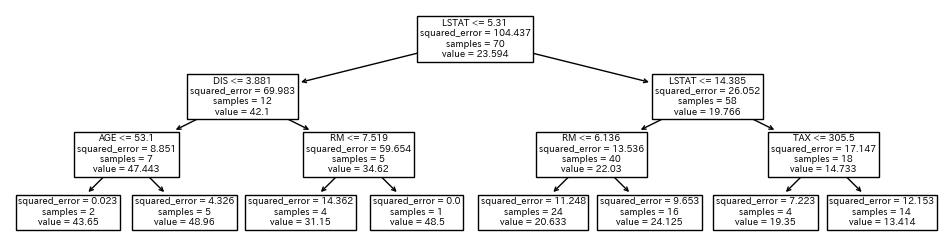

In [3]:
url = 'https://bit.ly/4hwOUgx'
df = pd.read_csv(url)
df = df.drop(['CRIME'], axis = 1)
df = df.fillna(df.mean())
t_col = ['PRICE']
x = df.drop(['PRICE'], axis = 1)
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn import tree
model_tree = tree.DecisionTreeRegressor(max_depth = 3, random_state = random_seed)
model_tree.fit(X= x_train, y = t_train)
score_train = model_tree.score(X = x_train, y = t_train)
score_test = model_tree.score(X = x_test, y = t_test)
print(f'訓練データの決定係数={score_train:.3f} / テストデータの決定係数={score_test:.3f}')
display(pd.DataFrame(model_tree.feature_importances_, index = x.columns, columns = ['特徴量重要度']))
plt.figure(figsize = (12, 3))
tree.plot_tree(decision_tree = model_tree, feature_names = list(x.columns))
plt.show()